# WSU CPTS570 - Machine Learning - Ricardo Rivero
## Implementation of the Fortune Cookie classifier using Naive Bayes Classifier
Created on November 2nd, 2024

In [10]:
import math

import operator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

Training accuracy: 95.96%


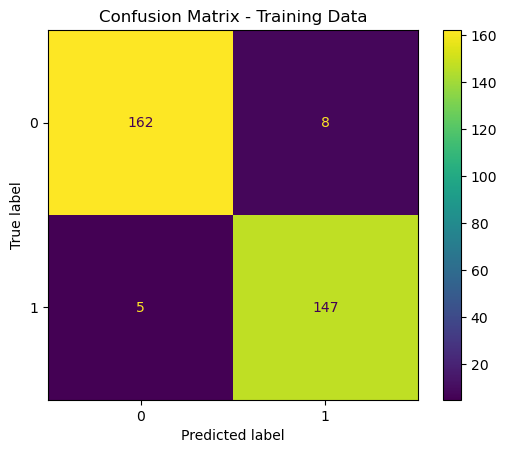

Test accuracy: 83.17%


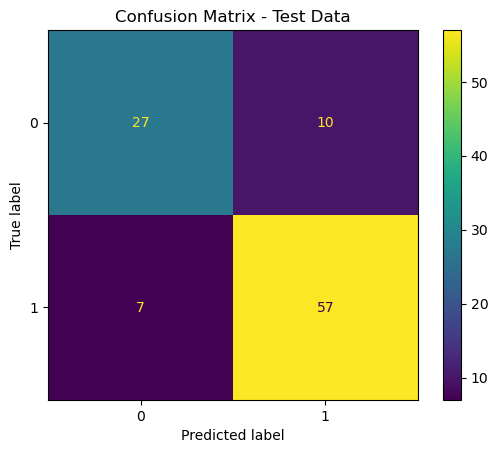

In [17]:
import time
import operator

class NaiveBayes:
    def __init__(self, vocabulary):
        self.vocabulary = vocabulary
        self.vocab_to_index = {word: idx for idx, word in enumerate(vocabulary)}
        self.class_word_counts = {}
        self.class_counts = {}

    def update(self, feature_vector, label):
        self.class_counts[label] = self.class_counts.get(label, 0) + 1
        if label not in self.class_word_counts:
            self.class_word_counts[label] = {}
        for idx, count in enumerate(feature_vector):
            if count > 0:
                self.class_word_counts[label][idx] = self.class_word_counts[label].get(idx, 0) + count

    def get_label_probability(self, feature_vector, checkLabel):
        nlabel = self.class_counts.get(checkLabel, 0)
        ntotalLabels = sum(self.class_counts.values())
        p_label = (nlabel + 1) / (ntotalLabels + 2)
        p_product = 1.0
        total_words_in_class = sum(self.class_word_counts.get(checkLabel, {}).values())
        vocab_size = len(self.vocabulary)

        for idx, count in enumerate(feature_vector):
            word_count = self.class_word_counts.get(checkLabel, {}).get(idx, 0)
            p_w_c = (word_count + 1) / (total_words_in_class + vocab_size)
            if count > 0:
                p_product *= p_w_c ** count
                # Ensure p_product doesn't become zero
                if p_product == 0:
                    p_product = 1e-10  # Set a minimum threshold

        return p_label * p_product

    def predict(self, feature_vector):
        p0 = self.get_label_probability(feature_vector, 0)
        p1 = self.get_label_probability(feature_vector, 1)
        pred_label = 0
        if p1 > p0:
            pred_label = 1
        return pred_label

def preprocess(data_path, label_path, vocabulary=None):
    stopList_Path = "fortune_cookie_data/stoplist.txt"
    with open(data_path, 'r') as f:
        rawData = f.readlines()
    with open(label_path, 'r') as f:
        rawLabels = f.readlines()
    with open(stopList_Path, 'r') as f:
        rawStoplist = f.readlines()

    stopList = set(word.strip() for word in rawStoplist)

    if vocabulary is None:
        vocabulary = set()
        for line in rawData:
            words = line.strip().split()
            for word in words:
                if word not in stopList:
                    vocabulary.add(word)
        vocabulary = sorted(vocabulary)
    else:
        vocabulary = sorted(vocabulary)

    labels = list(map(int, rawLabels))

    featureSets = []
    for line in rawData:
        lineWords = dict.fromkeys(vocabulary, 0)
        words = line.strip().split()
        for word in words:
            if word in lineWords:
                lineWords[word] = 1
        featureSets.append(lineWords)

    features = []
    for feature in featureSets:
        sorted_set = sorted(feature.items(), key=operator.itemgetter(0))
        features.append([x[1] for x in sorted_set])

    return features, labels, vocabulary

def train(features, labels, vocabulary):
    naiveBayes = NaiveBayes(vocabulary)


    for i in range(len(features)):
        feature_vector = features[i]
        label = labels[i]
        naiveBayes.update(feature_vector, label)


    mistakes = 0
    nFeatures = len(features)
    y_true = labels
    y_pred = []

    for i in range(nFeatures):
        feature_vector = features[i]
        label = labels[i]
        pred_label = naiveBayes.predict(feature_vector)
        y_pred.append(pred_label)
        if pred_label != label:
            mistakes += 1

    train_accuracy = (1 - mistakes / nFeatures) * 100
    print("Training accuracy: {:.2f}%".format(train_accuracy))

    return naiveBayes, y_true, y_pred

def test(features, labels, naiveBayes):
    mistakes = 0
    nFeatures = len(features)
    y_true = labels
    y_pred = []

    for i in range(nFeatures):
        feature_vector = features[i]
        label = labels[i]
        pred_label = naiveBayes.predict(feature_vector)
        y_pred.append(pred_label)
        if pred_label != label:
            mistakes += 1

    test_accuracy = (1 - mistakes / nFeatures) * 100
    print("Test accuracy: {:.2f}%".format(test_accuracy))

    return y_true, y_pred

def main():

    # Train
    train_data_path = 'fortune_cookie_data/traindata.txt'
    train_label_path = 'fortune_cookie_data/trainlabels.txt'

    train_features, train_labels, vocabulary = preprocess(train_data_path, train_label_path)
    naiveBayes, y_train_true, y_train_pred = train(train_features, train_labels, vocabulary)

    # Plot confusion matrix for training data
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot()
    plt.title('Confusion Matrix - Training Data')
    plt.savefig('confusion_matrix_NaiveBayes_training.jpeg', dpi = 600)
    plt.show()

    # Test
    test_data_path = 'fortune_cookie_data/testdata.txt'
    test_label_path = 'fortune_cookie_data/testlabels.txt'
    test_features, test_labels, _ = preprocess(test_data_path, test_label_path, vocabulary)
    y_test_true, y_test_pred = test(test_features, test_labels, naiveBayes)

    # Plot confusion matrix for test data
    cm_test = confusion_matrix(y_test_true, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot()
    plt.title('Confusion Matrix - Test Data')
    plt.savefig('confusion_matrix_NaiveBayes_test.jpeg', dpi = 600)
    plt.show()

if __name__ == '__main__':
    main()




Test accuracy using sci-kit learn: 83.17%
Train accuracy using sci-kit learn: 95.96%


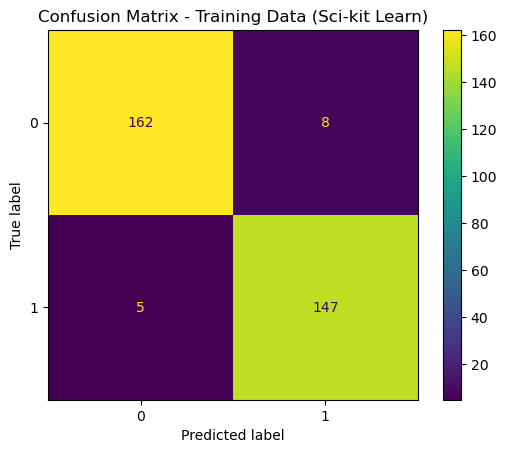

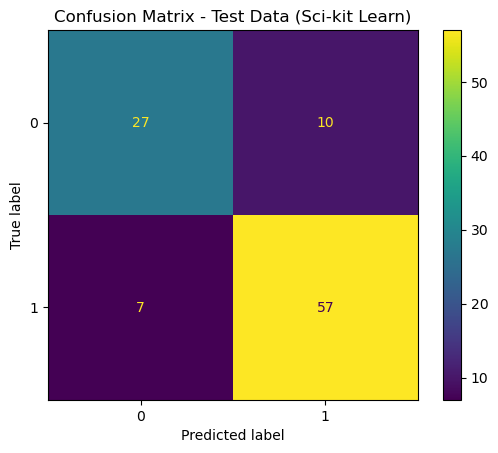

In [22]:
#Validate the implementation of Naive Bayes using sci-kit learn
from sklearn.naive_bayes import MultinomialNB

#Train data
train_data_path = 'fortune_cookie_data/traindata.txt'
train_label_path = 'fortune_cookie_data/trainlabels.txt'
#test data
test_data_path = 'fortune_cookie_data/testdata.txt'
test_label_path = 'fortune_cookie_data/testlabels.txt'

train_features, train_labels, vocabulary = preprocess(train_data_path, train_label_path)
test_features, test_labels, _ = preprocess(test_data_path, test_label_path, vocabulary)
#Train the model
MultinomialNaiveBayes = MultinomialNB()
y_pred = MultinomialNaiveBayes.fit(train_features, train_labels).predict(test_features)

#print accuracy
accuracy_test = MultinomialNaiveBayes.score(test_features, test_labels)
print("Test accuracy using sci-kit learn: {:.2f}%".format(accuracy_test*100))
accuracy_train = MultinomialNaiveBayes.score(train_features, train_labels)
print("Train accuracy using sci-kit learn: {:.2f}%".format(accuracy_train*100))

#Plot confusion matrix
cm_train = confusion_matrix(train_labels, MultinomialNaiveBayes.predict(train_features))
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Confusion Matrix - Training Data (Sci-kit Learn)')
plt.savefig('confusion_matrix_NaiveBayes_training_sci-kit.jpeg', dpi = 600)
plt.show()


cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Test Data (Sci-kit Learn)')
plt.savefig('confusion_matrix_NaiveBayes_test_sci-kit.jpeg', dpi = 600)
plt.show()



